## 1. 最小二乘法

<center>**最小二乘法的数学原理**</center>
![最小二乘法](./data/learn_WML_chapter_2_最小二乘法.jpg "最小二乘法的数学原理")

## 2. 一般统计机器学习模型的思路
1. 设置包含参数的量化模型（数学公式）
2. 设定评价参数的标准
3. 确定获得最优评价的参数
*第2、3两步循环进行优化，寻求实用性能最好的评价标准与优化后的参数*

## 3. 检测并解决过拟合（over fitting）导致的模型泛化能力（generalization ability）低问题
1. 数据集划分：训练集(trainning set)、验证集(validation set)、测试集(test set)
2. 多折交叉验证(cross validation)训练多个模型根据测试集评测结果寻找泛化能力最优的模型复杂度，然后按照该复杂度使用全部数据训练新模型投入使用
    例如五折交叉验证，将数据分为$\{D_1,D_2,D_3,D_4,D_5\}$,则：
    ![五折交叉验证](./data/learn_WML_chapter_2_五折交叉验证.jpg "五折交叉验证")
    然后按照最佳的M数使用全部数据D训练最终的实用模型（M这里代表了模型多项式最高项次数，等于未知系数个数，即代表模型复杂度）
3. 也可以增加数据量使得数据点个数远大于未知系数个数，防止over fitting
4. 在评价函数中增加正则项限制模型复杂度

## 以下为代码实现

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def create_dataset(num):
    x=np.array(range(num))/float(num-1)
    y=np.sin(2*np.pi*x)+np.random.normal(scale=0.3,size=num)
    return pd.DataFrame(data=np.transpose(np.array([x,y])),columns=['x','y'],dtype=np.float)

training set data sample:
          x         y
0  0.000000 -0.126712
1  0.111111  0.577984
2  0.222222  1.352303
3  0.333333  1.455120
4  0.444444 -0.178159
testing set data sample:
          x         y
0  0.000000  0.381244
1  0.111111  0.737693
2  0.222222  0.840159
3  0.333333  0.609762
4  0.444444  0.006726


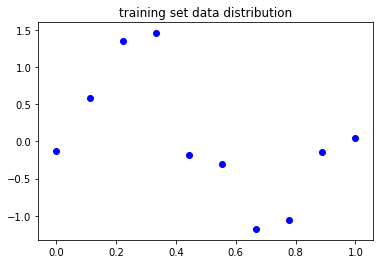

In [5]:
# create original dataset

N=10
M=[0,1,3,9]
# M=list(range(10))
train_set=create_dataset(N)
print("training set data sample:")
print(train_set.head())
test_set=create_dataset(N)
print("testing set data sample:")
print(test_set.head())

# scatter of original data
plt.scatter(train_set.x,train_set.y,marker="o",color="blue")
plt.title("training set data distribution")
plt.show()

In [6]:
# 最小二乘法
def resolve(dataset,m):
    # 最小二乘法求解核心过程
    phi=pd.DataFrame()
    for i in range(m+1):
        p=dataset.x**i
        p.name="x**{}".format(i)
        phi=pd.concat([phi,p],axis=1)
    tmp=np.linalg.inv(np.dot(phi.T,phi))
    t=dataset.y
    ws=np.dot(np.dot(tmp,phi.T),t)
    
    def f(x):
        y=0
        for i,w in enumerate(ws):
            y+=w*(x**i)
        return y
    # 返回一个函数的写法
    return f
# 均方误差RMS(Root mean square error)
def rms(dataset,f):
    err=0.0
    for index,line in dataset.iterrows():
        x,y=line.x,line.y
        err+=0.5*(y-f(x))**2
    return np.sqrt(2*err/len(dataset))
def show_result(subplot,train_set,m):
    f=resolve(train_set,m)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1,5)
    subplot.set_title("M={}".format(m),fontsize=10)
    # 真实数据散点图
    subplot.scatter(train_set.x,train_set.y,marker="o",color="blue",label=None)
    
    # 原始的数据生成函数曲线
    linex=np.linspace(0,1,101)
    liney=np.sin(2*np.pi*linex)
    subplot.plot(linex,liney,color="green",linestyle="--")
    
    # 多项式逼近拟合曲线
    linex=np.linspace(0,1,101)
    liney=f(linex)
    subplot.plot(linex,liney,color="red",label="E(RMS)={:.2f}".format(rms(train_set,f)))
    subplot.legend(loc=1,fontsize=10)

def show_rms_trend(train_set,test_set):
    df=pd.DataFrame(columns=["Training_set","Testing_set"])
    for m in range(10):
        f=resolve(train_set,m)
        train_err=rms(train_set,f)
        test_err=rms(test_set,f)
        df=df.append(pd.Series([train_err,test_err],index=["Training_set","Testing_set"]),ignore_index=True)
    df.plot(title="RMS Error",style=["-","--"],grid=True,ylim=(0,0.9))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


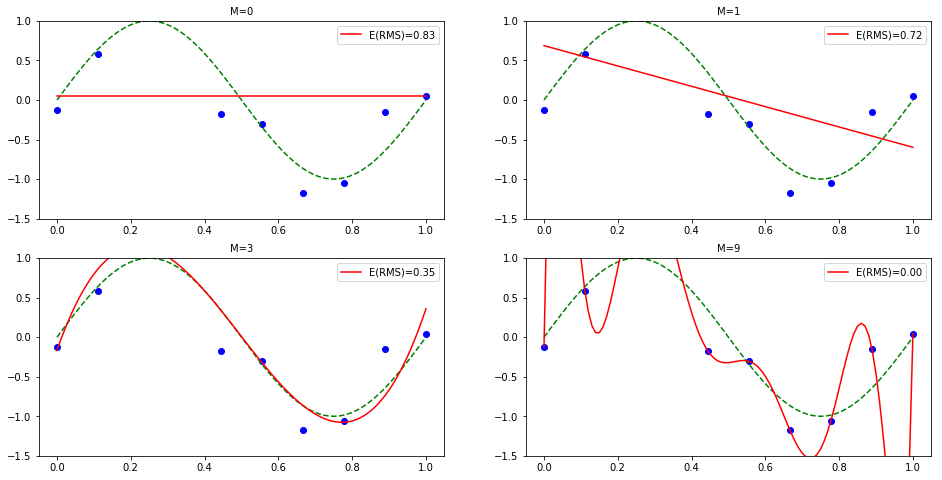

In [8]:
# 查看不同M时（不同模型复杂度）多项式函数逼近的拟合效果
fig=plt.figure(figsize=(16,8))
for i,m in enumerate(M):
    subplot=fig.add_subplot(2,2,i+1)
    show_result(subplot,train_set,m)
# fig.set_label("不同M时多项式函数的最小二乘拟合效果(不同模型复杂度)")
fig.show()

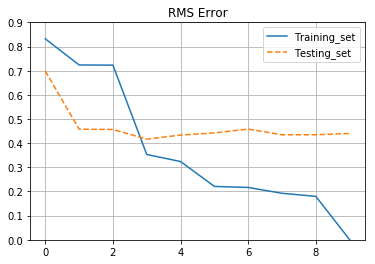

In [10]:
# 查看M从0到9变化时RMS Error的变化趋势
show_rms_trend(train_set,test_set)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


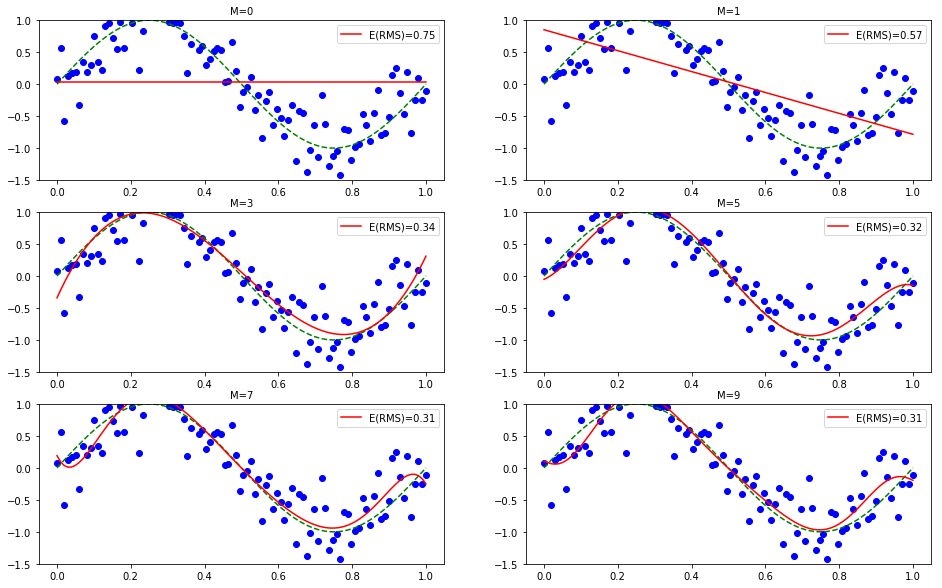

In [12]:
# 扩大数据量N对over fitting现象的缓解
N=100
M_2=[0,1,3,5,7,9]
train_set_2=create_dataset(N)
test_set_2=create_dataset(N)
fig=plt.figure(figsize=(16,10))
for i,m in enumerate(M_2):
    subplot=fig.add_subplot(3,2,i+1)
    show_result(subplot,train_set_2,m)
fig.show()

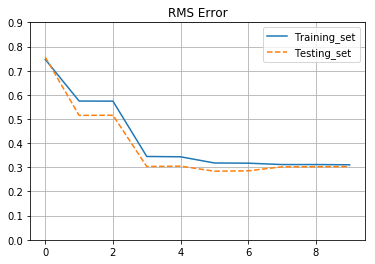

In [13]:
show_rms_trend(train_set_2,test_set_2)
# 可以明显看到由于数据量的扩充，模型复杂度M对模型泛化性能的影响显著下降甚至消失